In [2]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
#from google.colab import drive#to open the google drive in colab
#drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google'

In [271]:
#read all parameters of header
timeSteps=[]
boxDim=[]
num_frame=0
#with open(r'C:\bloodProject\NP\5937beads\np2.dat') as fp:   # to read lines if atomlist after "Atoms"
#with open('/content/drive/My Drive/Case/nanoBloodProject/MSD/16rc/janus8rcNp/EG-lig118.1/nvt2') as fp:
#with open('/content/drive/My Drive/Case/nanoBloodProject/MSD/sphere/8rc/152lig(correct)/8rcNp152homoLig/aijEG_N_lig1=26/nvt') as fp:
#with open('/content/drive/My Drive/Case/nanoBloodProject/MSD/disc/8rc/152lig/homo/secPos/correctNpTypeAij/aijEG_N_lig1=24/nvt') as fp:
#with open('/content/drive/My Drive/Case/nanoBloodProject/MSD/rod/12rc/170lig/homo/corNpAij/nvt') as fp:  
with open(r'C:\vmd\nvt') as fp:
    
        for line in fp:
            if 'ITEM: TIMESTEP' in line:                                         
                for line in fp: # now you are at the lines you want
                    if 'ITEM: NUMBER OF ATOMS' in line: 
                     break 
                   
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    #
                    timeSteps.append(line)# add the string in to the list
                    num_frame+=1
                    

            if 'ITEM: NUMBER OF ATOMS' in line:                                         
                for line in fp: # now you are at the lines you want
                    if 'ITEM: BOX BOUNDS' in line: 
                     break 
                   
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    #
                    num_atom=int(line)  

            if 'ITEM: BOX BOUNDS' in line:                                         
                for line in fp: # now you are at the lines you want
                    if 'ITEM: ATOMS' in line: 
                     break 
                   
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    
                    boxDim.append(line)               
                    

In [272]:
#read coordinate part
time_counter=0
lines=[]

#df.loc[:,'x'] = df.loc[:,'x'].astype(float)
#with open('/content/drive/My Drive/Case/nanoBloodProject/MSD/16rc/janus8rcNp/EG-lig118.1/nvt2') as fp:
#with open('/content/drive/My Drive/Case/nanoBloodProject/MSD/16rc/homo8rcNp/nvt') as fp:
#with open('/content/drive/My Drive/Case/nanoBloodProject/MSD/sphere/8rc/152lig(correct)/8rcNp152homoLig/aijEG_N_lig1=26/nvt') as fp:
#with open('/content/drive/My Drive/Case/nanoBloodProject/MSD/disc/8rc/152lig/homo/secPos/correctNpTypeAij/aijEG_N_lig1=24/nvt') as fp:
with open(r'C:\vmd\nvt') as fp:      
       for line in fp:
            atom_counter=0
            
            if 'ITEM: ATOMS' in line:
                time_counter+=1                                         
                
                for line in fp: # now you are at the lines you want
                    atom_counter+=1

                    #x(time_counter,atom_counter)=df.loc[line,'x'] 
                                        
                    if 'ITEM: TIMESTEP' in line: 
                     break 
                    
                    
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    lines.append(line)# add the string in to the list
                    #lines[time_counter][atom_counter]=line# add the string in to the list
                    
                    

In [273]:

num_frame
num_atom
#boxDim #i have to modify the code to get x max x min and so on for box dimensionpr


157950

In [274]:
#remove empty lines from the list
while("" in lines) : 
    lines.remove("") 

In [275]:
#data frame for the whole dump file without separating by frame
df=pd.DataFrame(lines, columns=['atomID']) # to make a data frame of pandas from the list and put atomID name on the column
df[['atomID','atomType','x','y','z']] = df.atomID.str.split(expand=True,) # to split one column to multiple columns and allocate name for each column
#df

In [276]:
df.iloc[1]

atomID       7699
atomType        3
x           0.549
y           0.550
z           0.000
Name: 1, dtype: object

**read the center of mass of NP**

In [277]:
type_Frame=np.zeros((num_frame,num_atom))


In [278]:
for i in range (0, num_frame):
   
   type_Frame[i,:]=df.atomType.values[(i*num_atom):((i*num_atom)+num_atom)] #thankGOD! to read x values for each frame and put in an array

In [279]:
type_Frame[:,:]

array([[3., 3., 3., ..., 4., 4., 4.],
       [3., 3., 3., ..., 4., 4., 4.],
       [3., 3., 3., ..., 4., 4., 4.],
       ...,
       [3., 3., 3., ..., 4., 4., 4.],
       [3., 3., 3., ..., 4., 4., 4.],
       [3., 3., 3., ..., 4., 4., 4.]])

In [280]:
for i in range (0, num_frame):
  num_atom_type=0
  for k in range (0, num_atom):
     if type_Frame[i,k]==1: #we only read atoms of EG layer with atom type 1
       num_atom_type+=1

In [281]:
num_atom_type

6860

In [282]:
ID_X_Frame=np.zeros ((num_frame+1,num_atom_type+1))
ID_Y_Frame=np.zeros ((num_frame+1,num_atom_type+1))
ID_Z_Frame=np.zeros ((num_frame+1,num_atom_type+1))

X_Frame=np.zeros (num_frame+1)
Y_Frame=np.zeros (num_frame+1)
Z_Frame=np.zeros (num_frame+1)

In [283]:
time_counter=0
for i in range (0, num_frame):
  atom_counter=0
  time_counter+=1
  for k in range (0, num_atom):
     if type_Frame[i,k]==1: #atom type of EG layer
       atom_counter+=1
       
 #print(time_counter,"",atom_counter)
       ID_X_Frame[time_counter,atom_counter]=df.x.values[k]

should we consider image flages as we did for catenane in MD???
 here in dump of DPD I did not save image flages!

In [284]:


Xave=np.zeros(num_frame+1) #average of x values for all beads of EG
Yave=np.zeros(num_frame+1)
Zave=np.zeros(num_frame+1)



time_counter=0
for i in range (0, num_frame):
  atom_counter=0
  time_counter+=1
  Xoverall=0 # after each frame this will be zero so count from begining for next frame
  Yoverall=0
  Zoverall=0
  for k in range (0, num_atom):
     
     if type_Frame[i,k]==1: # beads of EG layer
       atom_counter+=1
  
       ID_X_Frame[time_counter,atom_counter]=df.x.values[k]
       ID_Y_Frame[time_counter,atom_counter]=df.y.values[k]
       ID_Z_Frame[time_counter,atom_counter]=df.z.values[k]

       Xoverall = Xoverall + ID_X_Frame[time_counter,atom_counter]
       Yoverall = Yoverall + ID_Y_Frame[time_counter,atom_counter]
       Zoverall = Zoverall + ID_Z_Frame[time_counter,atom_counter]

       Xave[time_counter] = Xoverall/num_atom_type
       Yave[time_counter] = Yoverall/num_atom_type
       Zave[time_counter] = Zoverall/num_atom_type     
       
       X_Frame[time_counter]=ID_X_Frame[time_counter,atom_counter]
       Y_Frame[time_counter]=ID_Y_Frame[time_counter,atom_counter]
       Z_Frame[time_counter]=ID_Z_Frame[time_counter,atom_counter]

       

In [285]:
for i in range (0, num_frame):
  print(i,'',Zave[i],'',Z_Frame[i],'',num_atom) #here the center of box is in wall so Np is located above EG with distsnce around 14.9 nm so Zcm starts from 14.9 and when np go inside EG and be closer to wall the Zcm also decreases.
#Xoverall

0  0.0  0.0  157950
1  7.262762390670543  15.3  157950
2  6.99724548104957  15.69  157950
3  7.044741836734687  16.127  157950
4  7.017595189504367  16.434  157950
5  7.017587172011643  15.9  157950
6  6.996996938775507  15.1  157950
7  7.006189941690979  15.2  157950
8  7.014970845481041  15.7  157950
9  7.009508454810507  15.9  157950
10  7.026507434402322  15.2  157950
11  7.034485714285724  16.0  157950
12  7.033920845481058  16.1  157950
13  7.040690524781343  16.0  157950
14  7.060184839650141  15.3  157950
15  7.043744023323615  16.2  157950
16  7.033554810495629  15.516  157950
17  7.0232928571428666  15.8  157950
18  7.020297813411081  13.8  157950
19  6.9940599125364376  15.8  157950
20  6.99701166180758  15.47  157950
21  7.004396938775512  15.01  157950
22  7.023106268221587  16.0  157950
23  7.0149938775510225  16.2  157950
24  7.006779591836721  15.8  157950
25  7.021507142857119  15.0  157950
26  7.027475072886301  15.5  157950
27  7.018154227405283  13.6  157950
28  7.0

**calculate Rg** (new method)

In [286]:

Xave=0 #average of x values for all beads of EG
Yave=0
Zave=0



time_counter=0
for i in range (0, num_frame):
  atom_counter=0
  time_counter+=1
  Xoverall=0 # after each frame this will be zero so count from begining for next frame
  Yoverall=0
  Zoverall=0
  for k in range (0, num_atom):
     
     if type_Frame[i,k]==1: # beads of EG layer
       atom_counter+=1
  
       ID_X_Frame[time_counter,atom_counter]=df.x.values[k]
       ID_Y_Frame[time_counter,atom_counter]=df.y.values[k]
       ID_Z_Frame[time_counter,atom_counter]=df.z.values[k]

       Xoverall = Xoverall + ID_X_Frame[time_counter,atom_counter]
       Yoverall = Yoverall + ID_Y_Frame[time_counter,atom_counter]
       Zoverall = Zoverall + ID_Z_Frame[time_counter,atom_counter]

       Xave = Xoverall/num_atom_type
       Yave = Yoverall/num_atom_type
       Zave = Zoverall/num_atom_type     
       
     

In [287]:
#non time average msd of center of mass of NP
# make 1D arrays
sumDeltaR=0
sumDeltaRz=0
DeltaR=np.zeros (num_frame)
DeltaRz=np.zeros (num_frame)

dx=np.zeros (num_frame)
dy=np.zeros (num_frame)
dz=np.zeros (num_frame)



for k in range (0, num_atom_type):#thank god 
   Xrg=np.zeros (num_frame)
   Yrg=np.zeros (num_frame)
   Zrg=np.zeros (num_frame)
   sumDeltaR=0
   sumDeltaRz=0
   for t in range (1, num_frame):
   
       
         
                     
        dx[t]=ID_X_Frame[t,k]-Xave
        dy[t]=ID_Y_Frame[t,k]-Yave
        dz[t]=ID_Z_Frame[t,k]-Zave       
        
        Xrg[t]+=np.power(dx[t],2)
        Yrg[t]+=np.power(dy[t],2)
        Zrg[t]+=np.power(dz[t],2)
        
        DeltaR[t]= Xrg[t]+Yrg[t]+ Zrg[t];
        DeltaRz[t]= Zrg[t];
        sumDeltaR=sumDeltaR+DeltaR
        sumDeltaRz=sumDeltaRz+DeltaRz
   #print(t,'',dz,'',DeltaR)
        #print(t,'',Rmsd[t])

In [288]:
Rg2=sumDeltaR/num_atom_type
print(Rg2)

[0.         0.56364542 0.36396154 1.24791198 1.53901805 1.26493578
 0.35686373 0.89085613 1.67517751 1.9638494  0.77113829 1.21520959
 1.67711982 1.47311491 1.28250681 1.01131812 1.07959362 1.12002548
 1.16862154 1.12418643 1.09231625 1.51506743 2.04301472 0.56772637
 0.72594617 0.57323626 1.07448939 1.07769208 1.12138308 1.3284551
 1.2739432 ]


In [289]:
df = pd.DataFrame(Rg2)
df.to_excel(r'C:\vmd\Rg.xlsx')

# * Rg in Z direction *

In [290]:
Rg2z=sumDeltaRz/num_atom_type
print(Rg2z)

[0.         0.28689966 0.33340784 0.3149568  0.33205962 0.2347504
 0.29644736 0.33502898 0.2218895  0.33020123 0.3668117  0.22882648
 0.21955581 0.31263059 0.22357897 0.32706139 0.27102096 0.22906266
 0.23670078 0.22418239 0.20514252 0.33622709 0.30722534 0.34018032
 0.31557781 0.30679683 0.29644736 0.20980411 0.24183615 0.2184334
 0.20838871]


In [291]:
df = pd.DataFrame(Rg2z)
df.to_excel(r'C:\vmd\Rgz.xlsx')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


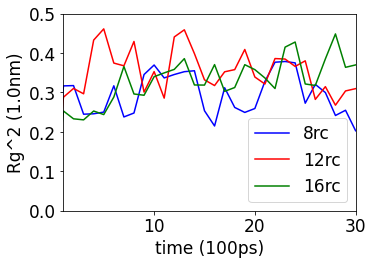

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 
from matplotlib import rcParams

#df =pd.ExcelFile('/content/drive/My Drive/Case/nanoBloodProject/rg/homo/152lig/lig/RgLigWhole.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
df =pd.ExcelFile(r'C:\vmd\rc1.0_RgZ_8,12,16rc.xlsx')
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= '8rc', color='blue', linewidth=1.5, label='8rc')
ax.legend()
Sheet1.plot(kind='line',  y= '12rc', color='red', linewidth=1.5, label='12rc', ax=ax)
ax=Sheet1.plot(kind='line', y= '16rc', color='green', linewidth=1.5, label='16rc', ax=ax)
#ax.legend()
#Sheet1.plot(kind='line',  x='a', y= 'd', color='green', linewidth=0.7, label='veryRigid', ax=ax)
ax.legend()


##########################################
ax.set_xlabel('time (100ps)')
ax.set_ylabel('Rg^2 (1.0nm)') 
#ax.set_yscale('log') #to plot in log scale

pylab.xlim([1,30])
plt.xticks(np.arange(10,31,10)) #the distance of units to be shown in x axis. it starts from 10 to 30 with idistance of 10.thankGOD!
pylab.ylim([0.0,0.5])# define the range of y coordinate
plt.yticks(np.arange(0,0.51,0.1))

rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "17"

#ax.get_legend().remove()

plt.rcParams["figure.figsize"] = [5.50, 4.0]
plt.rcParams["figure.autolayout"] = True

plt.ticklabel_format(axis="both", style="plain", scilimits=(0,0))#show the x and y axis in scientific 
###########################################

plt.savefig(r'C:\vmd\rc1.0_RgZ_8,12,16rc.png')

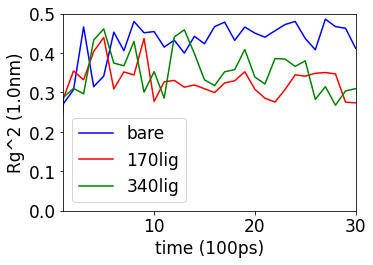

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 
from matplotlib import rcParams

#df =pd.ExcelFile('/content/drive/My Drive/Case/nanoBloodProject/rg/homo/152lig/lig/RgLigWhole.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
df =pd.ExcelFile(r'C:\vmd\rc1.0_rg_z_bare,170,340lig.xlsx')
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= 'bare', color='blue', linewidth=1.5, label='bare')
ax.legend()
Sheet1.plot(kind='line',  y= '170lig', color='red', linewidth=1.5, label='170lig', ax=ax)
ax=Sheet1.plot(kind='line', y= '340lig', color='green', linewidth=1.5, label='340lig', ax=ax)
#ax.legend()
#Sheet1.plot(kind='line',  x='a', y= 'd', color='green', linewidth=0.7, label='veryRigid', ax=ax)
ax.legend()

##########################################
ax.set_xlabel('time (100ps)')
ax.set_ylabel('Rg^2 (1.0nm)') 
#ax.set_yscale('log') #to plot in log scale

pylab.xlim([1,30])
plt.xticks(np.arange(10,31,10)) #the distance of units to be shown in x axis. it starts from 10 to 30 with idistance of 10.thankGOD!
pylab.ylim([0.0,0.5])# define the range of y coordinate
plt.yticks(np.arange(0,0.51,0.1))

rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "17"

#ax.get_legend().remove()

plt.rcParams["figure.figsize"] = [5.50, 4.0]
plt.rcParams["figure.autolayout"] = True

plt.ticklabel_format(axis="both", style="plain", scilimits=(0,0))#show the x and y axis in scientific 
###########################################

#plt.savefig('/content/drive/My Drive/Case/nanoBloodProject/rg/homo/152lig/lig/RgLigWhole.png')
plt.savefig(r'C:\vmd\rc1.0_rg_z_bare,170,340lig.png')

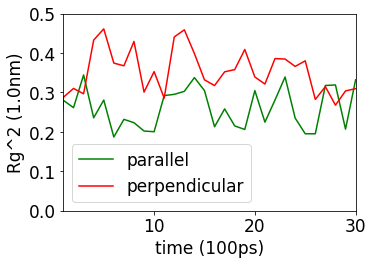

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

#df =pd.ExcelFile('/content/drive/My Drive/Case/nanoBloodProject/rg/homo/152lig/lig/RgLigWhole.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
df =pd.ExcelFile(r'C:\vmd\rc1.0_rg_z_parallel_perpend.xlsx')
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line',  y= 'parallel', color='green', linewidth=1.5, label='parallel')
ax.legend()
Sheet1.plot(kind='line',  y= 'perpend', color='red', linewidth=1.5, label='perpendicular', ax=ax)
ax.legend()
#ax=Sheet1.plot(kind='line',  x='a', y= 'd', color='green', linewidth=0.5, label='135', ax=ax)
#ax.legend()

##########################################
ax.set_xlabel('time (100ps)')
ax.set_ylabel('Rg^2 (1.0nm)') 
#ax.set_yscale('log') #to plot in log scale

pylab.xlim([1,30])
plt.xticks(np.arange(10,31,10)) #the distance of units to be shown in x axis. it starts from 10 to 30 with idistance of 10.thankGOD!
pylab.ylim([0.0,0.5])# define the range of y coordinate
plt.yticks(np.arange(0,0.51,0.1))

rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "17"

#ax.get_legend().remove()

plt.rcParams["figure.figsize"] = [5.50, 4.0]
plt.rcParams["figure.autolayout"] = True

plt.ticklabel_format(axis="both", style="plain", scilimits=(0,0))#show the x and y axis in scientific 
###########################################

plt.savefig(r'C:\vmd\rc1.0_rg_z_parallel_perpend(2).png')


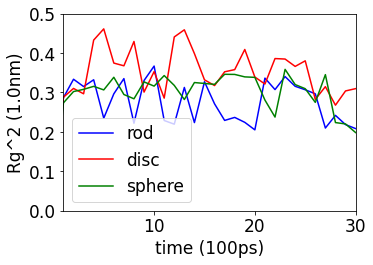

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

#df =pd.ExcelFile('/content/drive/My Drive/Case/nanoBloodProject/rg/homo/152lig/lig/RgLigWhole.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
df =pd.ExcelFile(r'C:\vmd\rc1.0_rg_z, rod,disc,sphere,.xlsx')
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= 'rod', color='blue', linewidth=1.5, label='rod')
ax.legend()
Sheet1.plot(kind='line',  y= 'disc', color='red', linewidth=1.5, label='disc', ax=ax)
ax=Sheet1.plot(kind='line', y= 'sphere', color='green', linewidth=1.5, label='sphere', ax=ax)
#ax.legend()
#Sheet1.plot(kind='line',  x='a', y= 'd', color='green', linewidth=0.7, label='veryRigid', ax=ax)
ax.legend()

##########################################
ax.set_xlabel('time (100ps)')
ax.set_ylabel('Rg^2 (1.0nm)') 
#ax.set_yscale('log') #to plot in log scale

pylab.xlim([1,30])
plt.xticks(np.arange(10,31,10)) #the distance of units to be shown in x axis. it starts from 10 to 30 with idistance of 10.thankGOD!
pylab.ylim([0.0,0.5])# define the range of y coordinate
plt.yticks(np.arange(0,0.51,0.1))

rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "17"

#ax.get_legend().remove()

plt.rcParams["figure.figsize"] = [5.50, 4.0]
plt.rcParams["figure.autolayout"] = True

plt.ticklabel_format(axis="both", style="plain", scilimits=(0,0))#show the x and y axis in scientific 
###########################################

plt.savefig(r'C:\vmd\rc1.0_rg_z, rod,disc,sphere,(2).png')

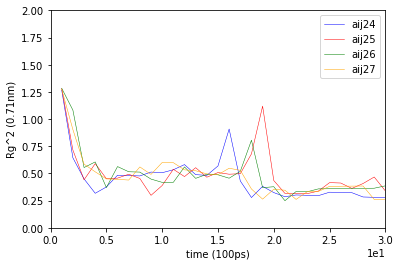

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

#df =pd.ExcelFile('/content/drive/My Drive/Case/nanoBloodProject/rg/homo/152lig/lig/RgLigWhole.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
df =pd.ExcelFile('/content/drive/My Drive/Case/nanoBloodProject/rg/rgAij24...27.xlsx')
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line',  x='a', y= 'b', color='blue', linewidth=0.5, label='aij24')
ax.legend()
Sheet1.plot(kind='line',  x='a', y= 'c', color='red', linewidth=0.5, label='aij25', ax=ax)
Sheet1.plot(kind='line',  x='a', y= 'd', color='green', linewidth=0.5, label='aij26', ax=ax)
Sheet1.plot(kind='line',  x='a', y= 'e', color='orange', linewidth=0.5, label='aij27', ax=ax)
ax.legend()
ax.set_xlabel('time (100ps)')
ax.set_ylabel('Rg^2 (0.71nm)') 
pylab.xlim([0,30])
pylab.ylim([0,2])# define the range of y coordinate
plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))#show the x and y axis in scientific mode
#plt.savefig('/content/drive/My Drive/Case/nanoBloodProject/rg/homo/152lig/lig/RgLigWhole.png')
plt.savefig('/content/drive/My Drive/Case/nanoBloodProject/rg/rgAij24...27.png')

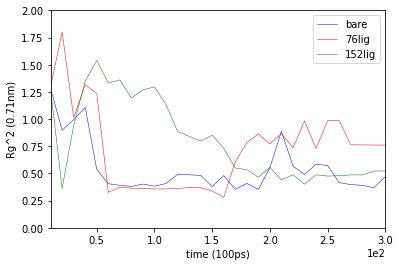

In [29]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

#df =pd.ExcelFile('/content/drive/My Drive/Case/nanoBloodProject/rg/homo/152lig/lig/RgLigWhole.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
df =pd.ExcelFile('/content/drive/My Drive/Case/nanoBloodProject/rg/12rcRodBare170,340lig.xlsx')
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line',  x='a', y= 'b', color='blue', linewidth=0.5, label='bare')
ax.legend()
Sheet1.plot(kind='line',  x='a', y= 'c', color='red', linewidth=0.5, label='76lig', ax=ax)
Sheet1.plot(kind='line',  x='a', y= 'd', color='green', linewidth=0.5, label='152lig', ax=ax)
ax.legend()
ax.set_xlabel('time (100ps)')
ax.set_ylabel('Rg^2 (0.71nm)') 
pylab.xlim([10,300])
pylab.ylim([0,2])# define the range of y coordinate
plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))#show the x and y axis in scientific mode
#plt.savefig('/content/drive/My Drive/Case/nanoBloodProject/rg/homo/152lig/lig/RgLigWhole.png')
plt.savefig('/content/drive/My Drive/Case/nanoBloodProject/rg/12rcRodBare170,340lig.png')

In [ ]:
df = pd.DataFrame(Rg2)
df.to_excel(r'C:\vmd\Rg.xlsx')

**Zmsd only the motion in z direction**

In [ ]:
df = pd.DataFrame(Zmsd).T
df.to_excel('/content/drive/My Drive/Case/nanoBloodProject/MSD/ZMSDnonTimAve.xlsx')

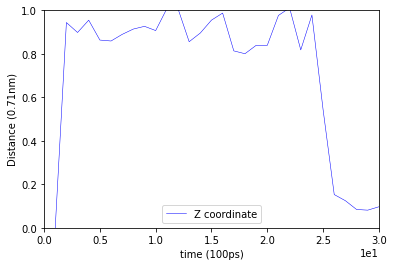

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

df =pd.ExcelFile('/content/drive/My Drive/Case/nanoBloodProject/MSD/ZMSDnonTimAve.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line',  x='a', y= 'b', color='blue', linewidth=0.5, label='Z coordinate')
ax.legend()
#Sheet1.plot(kind='line',  x='a', y= 'c', color='red', linewidth=0.5, label='toluene', ax=ax)
#Sheet1.plot(kind='line',  x='a', y= 'd', color='green', linewidth=0.5, label='interface', ax=ax)
ax.legend()
ax.set_xlabel('time (100ps)')
ax.set_ylabel('Distance (0.71nm)') 
pylab.xlim([0,30])
pylab.ylim([0,1])# define the range of y coordinate
plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))#show the x and y axis in scientific mode
plt.savefig('/content/drive/My Drive/Case/nanoBloodProject/MSD/ZMSDnonTimAve.png')

In [ ]:
df = pd.DataFrame(Xmsd).T
df.to_excel('/content/drive/My Drive/Case/nanoBloodProject/MSD/XMSDnonTimAve.xlsx')

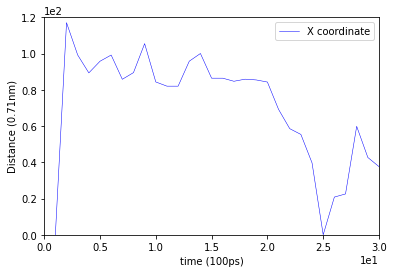

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

df =pd.ExcelFile('/content/drive/My Drive/Case/nanoBloodProject/MSD/XMSDnonTimAve.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line',  x='a', y= 'b', color='blue', linewidth=0.5, label='X coordinate')
ax.legend()
#Sheet1.plot(kind='line',  x='a', y= 'c', color='red', linewidth=0.5, label='toluene', ax=ax)
#Sheet1.plot(kind='line',  x='a', y= 'd', color='green', linewidth=0.5, label='interface', ax=ax)
ax.legend()
ax.set_xlabel('time (100ps)')
ax.set_ylabel('Distance (0.71nm)') 
pylab.xlim([0,30])
pylab.ylim([0,120])# define the range of y coordinate
plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))#show the x and y axis in scientific mode
plt.savefig('/content/drive/My Drive/Case/nanoBloodProject/MSD/XMSDnonTimAve.png')

In [ ]:
df = pd.DataFrame(Ymsd).T
df.to_excel('/content/drive/My Drive/Case/nanoBloodProject/MSD/YMSDnonTimAve.xlsx')

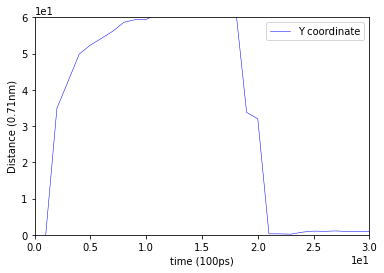

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

df =pd.ExcelFile('/content/drive/My Drive/Case/nanoBloodProject/MSD/YMSDnonTimAve.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line',  x='a', y= 'b', color='blue', linewidth=0.5, label='Y coordinate')
ax.legend()
#Sheet1.plot(kind='line',  x='a', y= 'c', color='red', linewidth=0.5, label='toluene', ax=ax)
#Sheet1.plot(kind='line',  x='a', y= 'd', color='green', linewidth=0.5, label='interface', ax=ax)
ax.legend()
ax.set_xlabel('time (100ps)')
ax.set_ylabel('Distance (0.71nm)') 
pylab.xlim([0,30])
pylab.ylim([0,60])# define the range of y coordinate
plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))#show the x and y axis in scientific mode
plt.savefig('/content/drive/My Drive/Case/nanoBloodProject/MSD/YMSDnonTimAve.png')

**time ave MSD**

In [ ]:
#thankGOd! time ave MSD:
MSD=np.zeros  (num_frame)

for i in range (0,num_frame):
  if i==0:
    Rmsd[i]=0
    
  MSD[i]=Rmsd[i]/(num_frame)
  print(i,"",MSD[i])

0  0.0
1  10.433950616876363
2  9.382222679881608
3  10.798930937435086
4  9.88045448672101
5  9.962145457339291
6  9.950913959631201
7  10.280510887110033
8  9.751528089094073
9  10.14850925343647
10  9.73371179077444
11  9.75912791663047
12  9.703537302026703
13  8.787320634926004
14  9.015578145145334
15  8.886494012003617
16  9.038411194085466
17  9.090059760011295
18  8.713746390804381
19  8.528802699287468
20  8.567725431048832
21  8.457161414777362
22  8.457161414777362
23  8.364716870097844
24  8.364716870097844
25  8.364716870097844
26  8.176310842549652
27  8.328624394649406
28  8.328624394649406
29  8.459915018601324
30  8.47585830787949
31  8.661541286011023
32  8.661541286011023
33  8.520574248737073
34  8.380136237979
35  8.380136237979
36  8.008803290072485
37  8.000968544009265
38  7.8857739642984805
39  7.8857739642984805
40  7.821022855109467
41  7.568695989884371
42  7.589656842139705
43  7.3577536205821
44  7.3577536205821
45  7.868901204990125
46  7.897048805256523

In [ ]:
MSDx=np.zeros (num_frame)

for i in range (0,num_frame):
 if i==0:
    Xmsd[i]=0
    
 MSDx[i]=Xmsd[i]/((num_frame-i)*num_atom_type)
 print(MSDx)

In [ ]:
MSDy=np.zeros (num_frame)

for i in range (0,num_frame):
 if i==0:
    Ymsd[i]=0
    
 MSDy[i]=Ymsd[i]/((num_frame-i)*num_atom_type)
 print(MSDy)

In [ ]:
#non time ave MSD of NP that from far distance reach to wall (at zero Z)
MSDz=np.zeros (num_frame)

for i in range (1,num_frame):
 if i==0:
    Zmsd[i]=0
    
 MSDz[i]=Zmsd[i]/(num_frame)
 print(i,"",MSDz[i])

1  4.280895580579744
2  4.15719154317714
3  4.025338036656669
4  3.685404200387202
5  3.3802451773348903
6  3.1399944862808136
7  2.9477191067475306
8  2.7354961736760717
9  2.643188488990805
10  2.5200533700890944
11  2.3616579883652458
12  2.308761519818239
13  2.1831554313504156
14  2.133800502310391
15  2.0783965068750936
16  2.0699968466934955
17  2.0691958157025074
18  2.0549980205205993
19  2.042282818074421
20  1.9994314316576376
21  1.9845780347499644
22  1.9845780347499644
23  1.9522544740619243
24  1.9522544740619243
25  1.9522544740619243
26  1.9075162501220495
27  1.8939470716720035
28  1.8939470716720035
29  1.9166564354740971
30  1.8752672657949259
31  1.884112816323898
32  1.884112816323898
33  1.8824463601113688
34  1.8475279231592152
35  1.8475279231592152
36  1.8092542741915816
37  1.8034063700793592
38  1.798792568265071
39  1.798792568265071
40  1.7830435270747786
41  1.740015776923464
42  1.7469502036063849
43  1.7387515234859552
44  1.7387515234859552
45  1.72982

In [ ]:
df = pd.DataFrame(MSD).T
df.to_excel('/content/drive/My Drive/Case/nanoBloodProject/MSD/MSDnonTimAve.xlsx')

In [ ]:
df2=pd.read_excel('/content/drive/My Drive/Case/nanoBloodProject/MSD/MSDnonTimAve.xlsx')

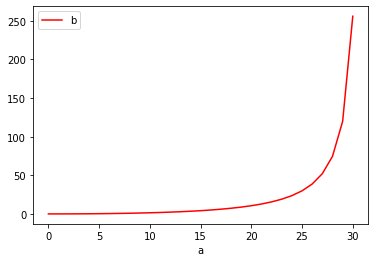

In [ ]:
df2.plot(kind='line', x='a',y='b',color='red')

In [ ]:
df = pd.DataFrame(MSDx).T
df.to_excel('/content/drive/My Drive/Case/Courses/python/MSDx.xlsx')

In [ ]:
df2=pd.read_excel('/content/drive/My Drive/Case/Courses/python/MSDx.xlsx')

In [ ]:
df2.plot(kind='line', x='a',y='b',color='red')

In [ ]:
df = pd.DataFrame(MSDy).T
df.to_excel('/content/drive/My Drive/Case/Courses/python/MSDy.xlsx')

In [ ]:
df2=pd.read_excel('/content/drive/My Drive/Case/Courses/python/MSDy.xlsx')

In [ ]:
df2.plot(kind='line', x='a',y='b',color='red')

**MSDz**

In [ ]:
df = pd.DataFrame(MSDz).T
df.to_excel('/content/drive/My Drive/Case/nanoBloodProject/MSD/MSDzNonTimAve2.xlsx')

In [ ]:
#df2=pd.read_excel('/content/drive/My Drive/Case/nanoBloodProject/MSD/MSDzNonTimAve.xlsx')

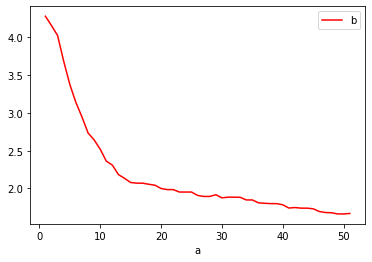

In [ ]:
#df2.plot(kind='line', x='a',y='b',color='red')

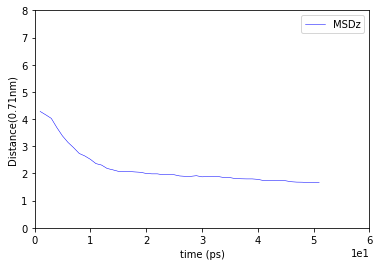

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

df =pd.ExcelFile('/content/drive/My Drive/Case/nanoBloodProject/MSD/MSDzNonTimAve.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line',  x='a', y= 'b', color='blue', linewidth=0.5, label='MSDz')
ax.legend()
#Sheet1.plot(kind='line',  x='a', y= 'c', color='red', linewidth=0.5, label='toluene', ax=ax)
#Sheet1.plot(kind='line',  x='a', y= 'd', color='green', linewidth=0.5, label='interface', ax=ax)
ax.legend()
ax.set_xlabel('time (ps)')
ax.set_ylabel('Distance(0.71nm)') 
pylab.xlim([0,60])
pylab.ylim([0,8])# define the range of y coordinate
plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))#show the x and y axis in scientific mode
plt.savefig('/content/drive/My Drive/Case/nanoBloodProject/MSD/MSDzNonTimAve3.png')